In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
wine_data = load_wine()
df_data=pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_target=pd.DataFrame(wine_data.target, columns=["kind"])
totall_data=pd.concat([df_data,df_target], axis=1)

In [3]:
totall_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

In [4]:
df_data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
df_data.dropna() #결측값 있는 행 제거
df_data.dropna(axis=1) #결측값 있는 열 제거

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


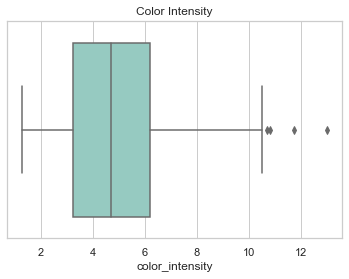

In [6]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="color_intensity",data=totall_data, palette="Set3")
plt.title("Color Intensity")
plt.show()

<AxesSubplot:xlabel='kind', ylabel='count'>

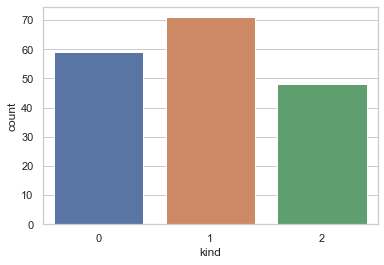

In [7]:
sns.countplot(data=totall_data, x="kind")

In [8]:
totall_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


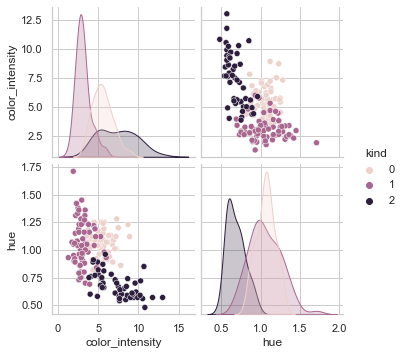

In [9]:
sns.pairplot(totall_data,
             vars=['color_intensity', 'hue'],
            hue ='kind')
plt.show()

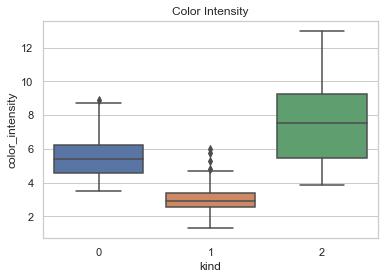

In [10]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="kind", y="color_intensity", data=totall_data)
plt.title("Color Intensity")
plt.show()

Text(0.5, 1.0, 'Alcohol')

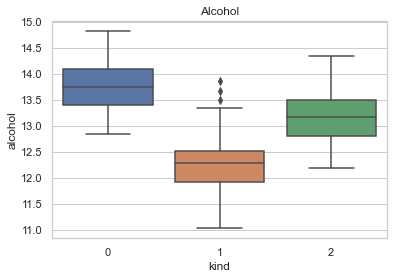

In [11]:
sns.boxplot(x="kind", y="alcohol", data=totall_data)
plt.title("Alcohol")

In [12]:
#X=totall_data.drop('kind',axis=1)
#X.head()

In [13]:
y=totall_data['kind']
y.value_counts()

1    71
0    59
2    48
Name: kind, dtype: int64

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: kind, Length: 178, dtype: int32

In [15]:
#Splitting the data into training and test test
X = totall_data.iloc[:,0:13].values
y = totall_data.iloc[:,13].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [16]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [20]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [18]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
#softmax, tanh, relu
model.add(Dense(50,input_shape=(13,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.003),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
Total params: 2,913
Trainable params: 2,913
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
5/5 [==============================] - 1s 65ms/step - loss: 41.2727 - accuracy: 0.2958 - val_loss: 9.4140 - val_accuracy: 0.7500
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 15.7935 - accuracy: 0.3803 - val_loss: 5.1506 - val_accuracy: 0.3889
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 3.9776 - accuracy: 0.3662 - val_loss: 5.0759 - val_accuracy: 0.1667
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 2.6683 - accuracy: 0.3169 - val_loss: 2.2437 - val_accuracy: 0.3889
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 2.6001 - accuracy: 0.3592 - val_loss: 1.7886 - val_accuracy: 0.4444
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 1.4416 - accuracy: 0.4155 - val_loss: 1.5057 - val_accuracy: 0.3889
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 1.4863 - accuracy: 0.3944 - val_loss: 0.8702 - val_accuracy: 0.5000
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 9ms/step - loss: 0.4456 - accuracy: 0.8732 - val_loss: 0.4720 - val_accuracy: 0.8056
Epoch 60/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4685 - accuracy: 0.8239 - val_loss: 0.3490 - val_accuracy: 0.9444
Epoch 61/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4217 - accuracy: 0.8732 - val_loss: 0.3281 - val_accuracy: 0.9167
Epoch 62/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4014 - accuracy: 0.8873 - val_loss: 0.3659 - val_accuracy: 0.8333
Epoch 63/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4506 - accuracy: 0.8169 - val_loss: 0.4923 - val_accuracy: 0.8333
Epoch 64/100
5/5 [==============================] - 0s 11ms/step - loss: 0.4088 - accuracy: 0.8239 - val_loss: 0.3528 - val_accuracy: 0.8333
Epoch 65/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4828 - accuracy: 0.7535 - val_loss: 0.4863 - val_accuracy: 0.7778
Epoch 66/100
5/5 [===========

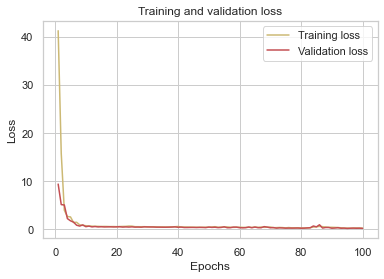

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

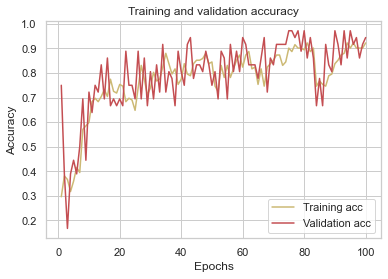

In [22]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.96      0.96        36
weighted avg       0.94      0.94      0.94        36

[[13  1  0]
 [ 1 15  0]
 [ 0  0  6]]
